<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Ingestão;</li>
  <li>Objetivos;</li>
  <li>Ferramentas;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

---

# **Introdução ao Projeto**

# Objetivos

O projeto foi realizado com o uso de um chatbot para monitorar e automatizar, com o uso de uma API, as mensagens transmitidas em um grupo da rede social Telegram. Em seguida, realizar o envio dessas informações para a ferramenta de computação em nuvem Amazon Web Services.



# Ferramentas

O projeto contou com o uso da ferramenta de computação em nuvem Amazon Web Services. Os serviços utilizados serão listados abaixo.

**AWS S3:** O Amazon Simple Storage Service é um serviço de armazenamento em nuvem que é utilizado para armazenar, de forma segura, quaisquer quantidades de dados. Além de também facilitar na recuperação dos dados armazenados, o serviço é pago a depender da quantidade de dados armazenados.

**AWS Lambda:** É um programa orientado a eventos que executa códigos, é muito utilizado para uso de aplicações modernas e técnologia sem servidor. Este serviço encontra-se pago a depender da quantidade de dados trabalhados.

**AWS IAM:** AWS Identity and Access Management (IAM) é um serviço utilizado para o controle de acesso dos recursos da AWS, limitando os acessos dos usuários autenticados.

**AWS API Gateway:** É o serviço responsável por administrar APIs com mais facilidade, utilizado em Back-End, também é capaz de lidar com grandes volumes de dados e sem servidor.

**AWS Event Bridge:** Ferramenta de uso para controle de dados, podendo alterá-los sem a possibilidade de escrita de código, possibilitando uma maior praticidade e facilidade no monitoramento e alterações em tempo real.

**AWS Athena:** Serviço responsável por criar, alterar, monitorar, atualizar e excluir tabelas e dados utilizando o serviço de armazenamento AWS S3 e o SQL padrão.

## 1\. Ingestão

1.1. Criação de um `bucket` no `AWS S3` para o armazenamento de dados crus, utilizando o sufixo `-raw`.

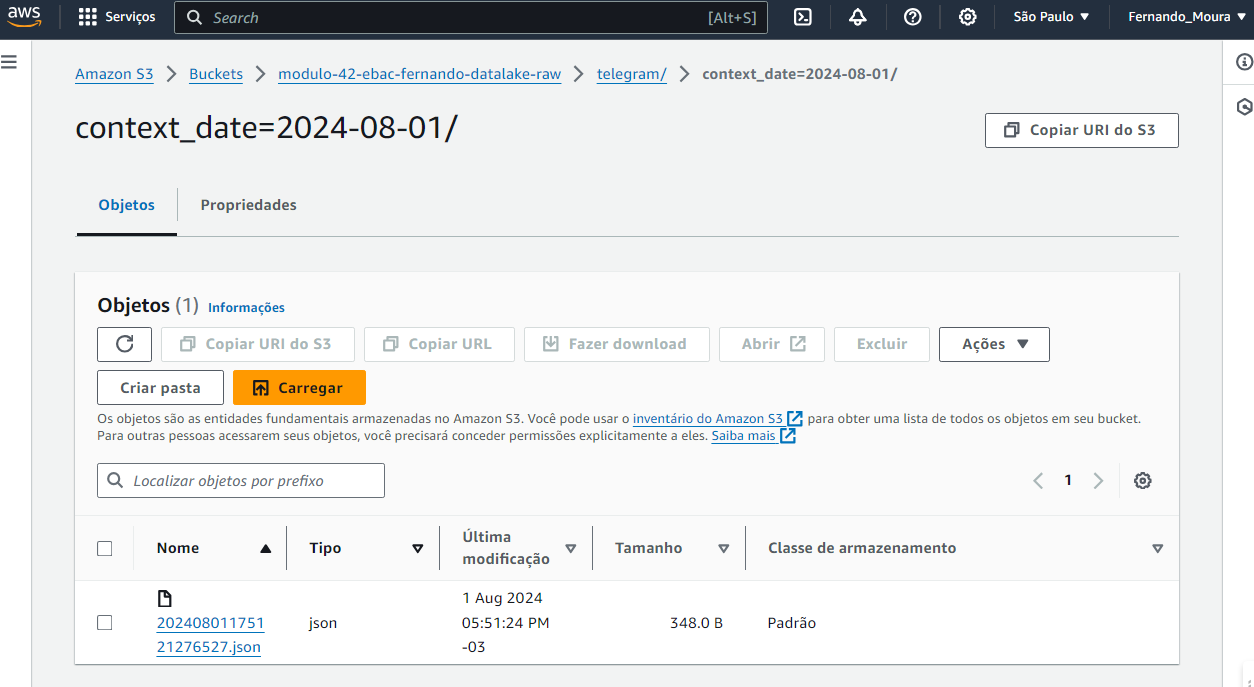

1.2. Criando uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus e configurando as variáveis de ambiente e de adicionando as permissões de interação com `AWS S3` no `AWS IAM`.

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente --> Método de segurança para não perder informações importantes.

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

1.3. Criando uma API no `AWS API Gateway` a conectando a função do `AWS Lambda`, conforme apresentado na aula.

> **Nota**: Sempre certificando que a confiabilidade e integridade dos dados serão mantidos.

In [1]:
# Anexando a chave de acesso.
from getpass import getpass

token = getpass()

··········


In [2]:
import json

import requests

base_url = f'https://api.telegram.org/bot{token}'

In [3]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7488634039:AAFzPg4_lbm_xKrib_u0IgSRWdDfs8Cfuiw/getMe
{
  "ok": true,
  "result": {
    "id": 7488634039,
    "is_bot": true,
    "first_name": "m42_ebac_fernandomoura_bot",
    "username": "m42_ebac_fernandomoura_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


In [4]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 675900764,
      "message": {
        "message_id": 7,
        "from": {
          "id": 508520708,
          "is_bot": false,
          "first_name": "Fernando",
          "last_name": "Moura",
          "username": "FernandoBMoura",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002222416965,
          "title": "m42 ebac Fernando Moura Grupo",
          "type": "supergroup"
        },
        "date": 1722543115,
        "text": "projeto telegram"
      }
    },
    {
      "update_id": 675900765,
      "message": {
        "message_id": 8,
        "from": {
          "id": 508520708,
          "is_bot": false,
          "first_name": "Fernando",
          "last_name": "Moura",
          "username": "FernandoBMoura",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002222416965,
          "title": "m42 ebac Fernando Moura Grupo",
          "type": "supergroup"
   

In [8]:
aws_api_gateway_url = getpass()

··········


1.4. Configurando o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**, utilizando o endereço da API criada no `AWS API Gateway` e o método `getWebhookInfo` para consultar a integração.

> **Nota**:  Sempre certificando que a confiabilidade e integridade dos dados serão mantidos.

In [9]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


In [10]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://d5p1ygxr9f.execute-api.sa-east-1.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "54.233.93.234"
  }
}


## 2\. ETL

2.1. Após a criação de um `bucket` no `AWS S3` para o armazenamento de dados enriquecidos, adicionando o sufixo `-enriched`, vamos para a proxima etapa.

2.2. Criar uma função no `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salvando o resultado em um único arquivo PARQUET, também particionado por dia. configurando as variáveis de ambiente, adicionando as permissões de interação com `AWS S3` no `AWS IAM`, configurando o *timeout* e dicionando a *layer* com o código do pacote Python PyArrow.

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  #date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

2.3. Criando uma regra no `AWS Event Bridge` para executar a função do `AWS Lambda` todo dia a meia noite no horário de Brasília (GMT-3).

## 3\. Apresentação

Após toda a configuração do Pipeline, vamos para a consulta dos dados extraídos utilizando o SQL no serviço Athena.

3.1. Criando a tabela no `AWS Athena` que aponte para os dados armazenados no bucket enriquecido criado no `AWS S3`.



```sql
CREATE EXTERNAL TABLE `telegram`(
	`message_id` bigint,
	`user_id` bigint,
	`user_is_bot` boolean,
	`user_first_name` string,
	`chat_id` bigint,
	`chat_type` string,
	`text` string,
	`date` bigint
)
PARTITIONED BY (`context_date` date)
ROW FORMAT SERDE 'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT 'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat' OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION 's3://modulo-42-ebac-fernandomoura-datalake-enriched/telegram/'
```



3.2. Executando o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

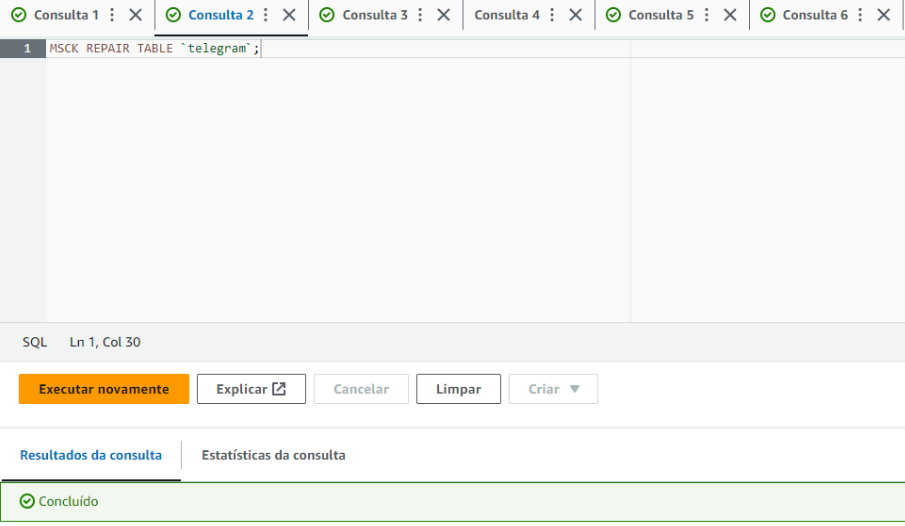

3.3. Abaiixo foram executadas as consultas SQL para explorar os dados obtidos.

Executando a consulta das 10 primeiras linhas de mensagens enviadas no grupo com o chatbot presente:


```sql
SELECT * FROM `telegram` LIMIT 10;
```



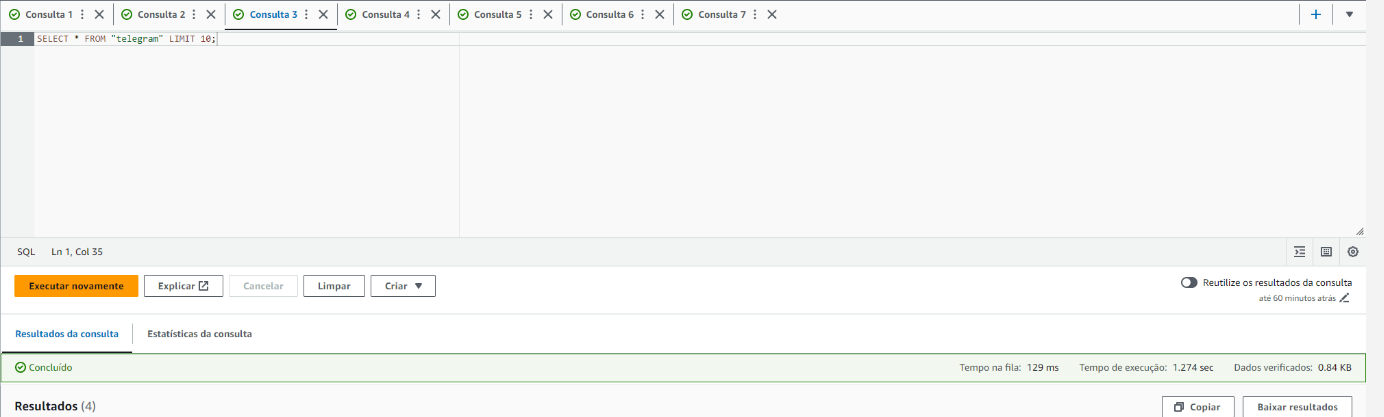

Imprimindo a quantidade de mensagens enviadas no dia:


```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```



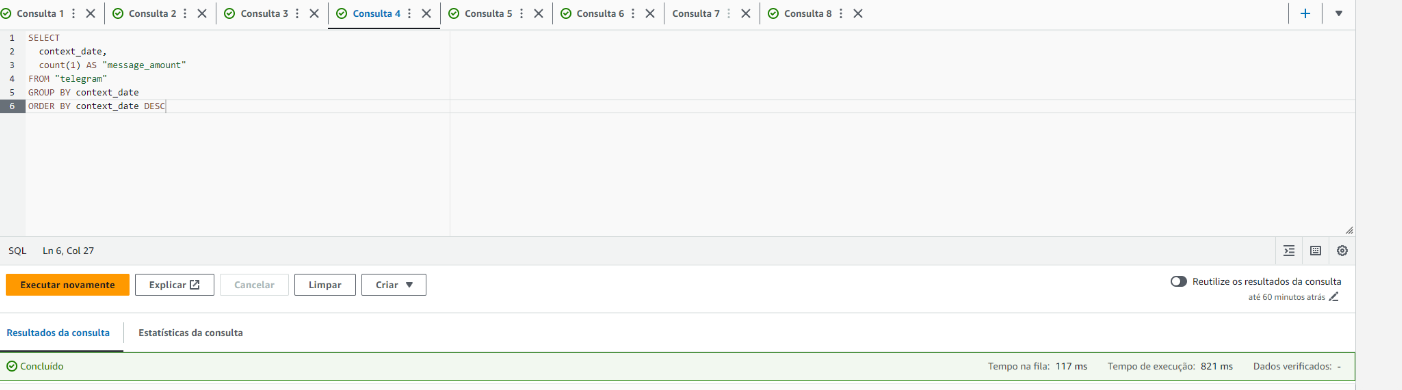

Imprimindo a quantidade de mensagens no dia enviadas por usuário:


```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```



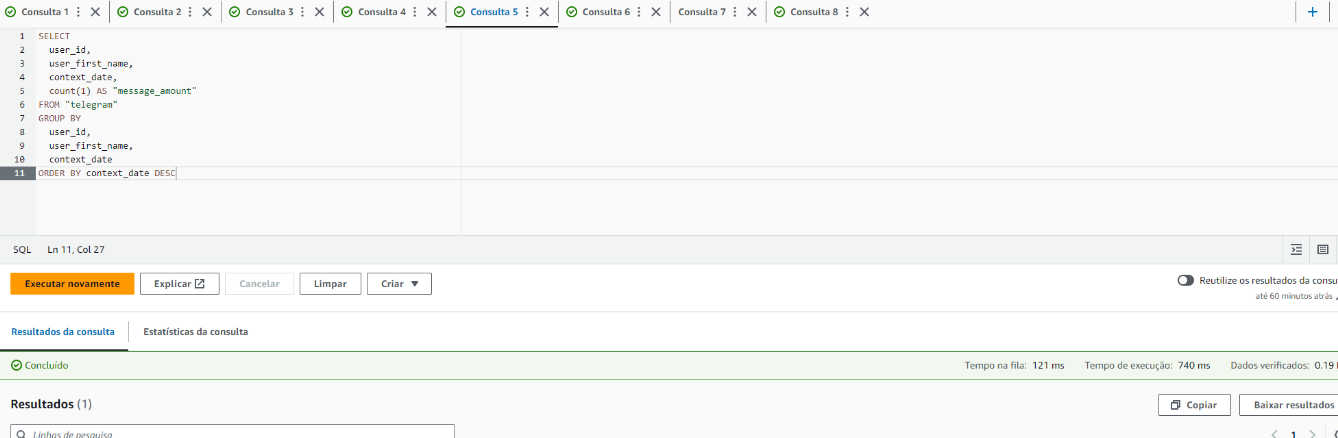

Realizando o cálculo médio de mensagens no dia enviadas por usuário:


```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```



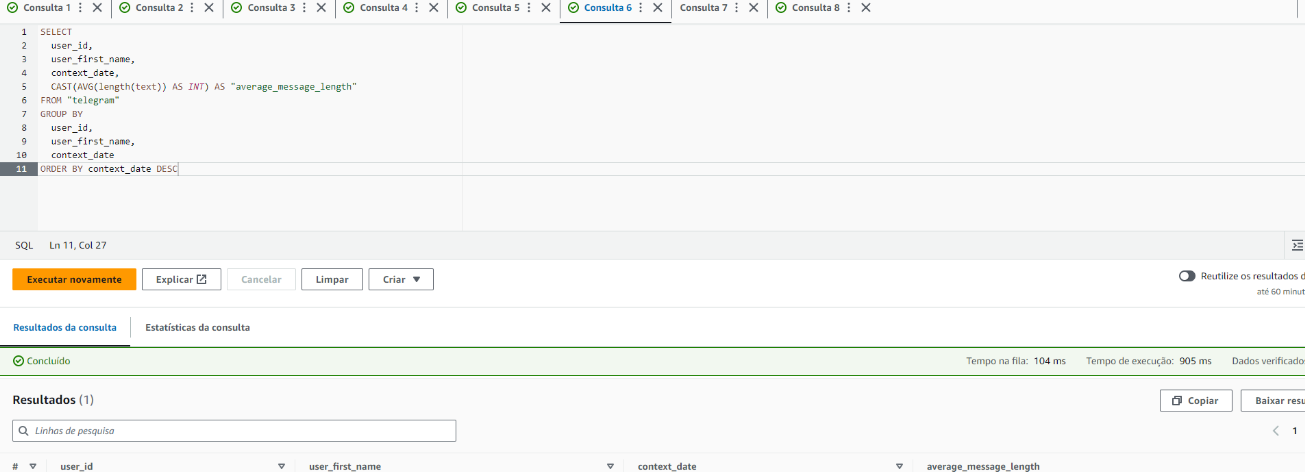

Imprimindo a quantidade de mensagens enviadas por hora, por dia da semana e número da semana:


```sql
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday
```



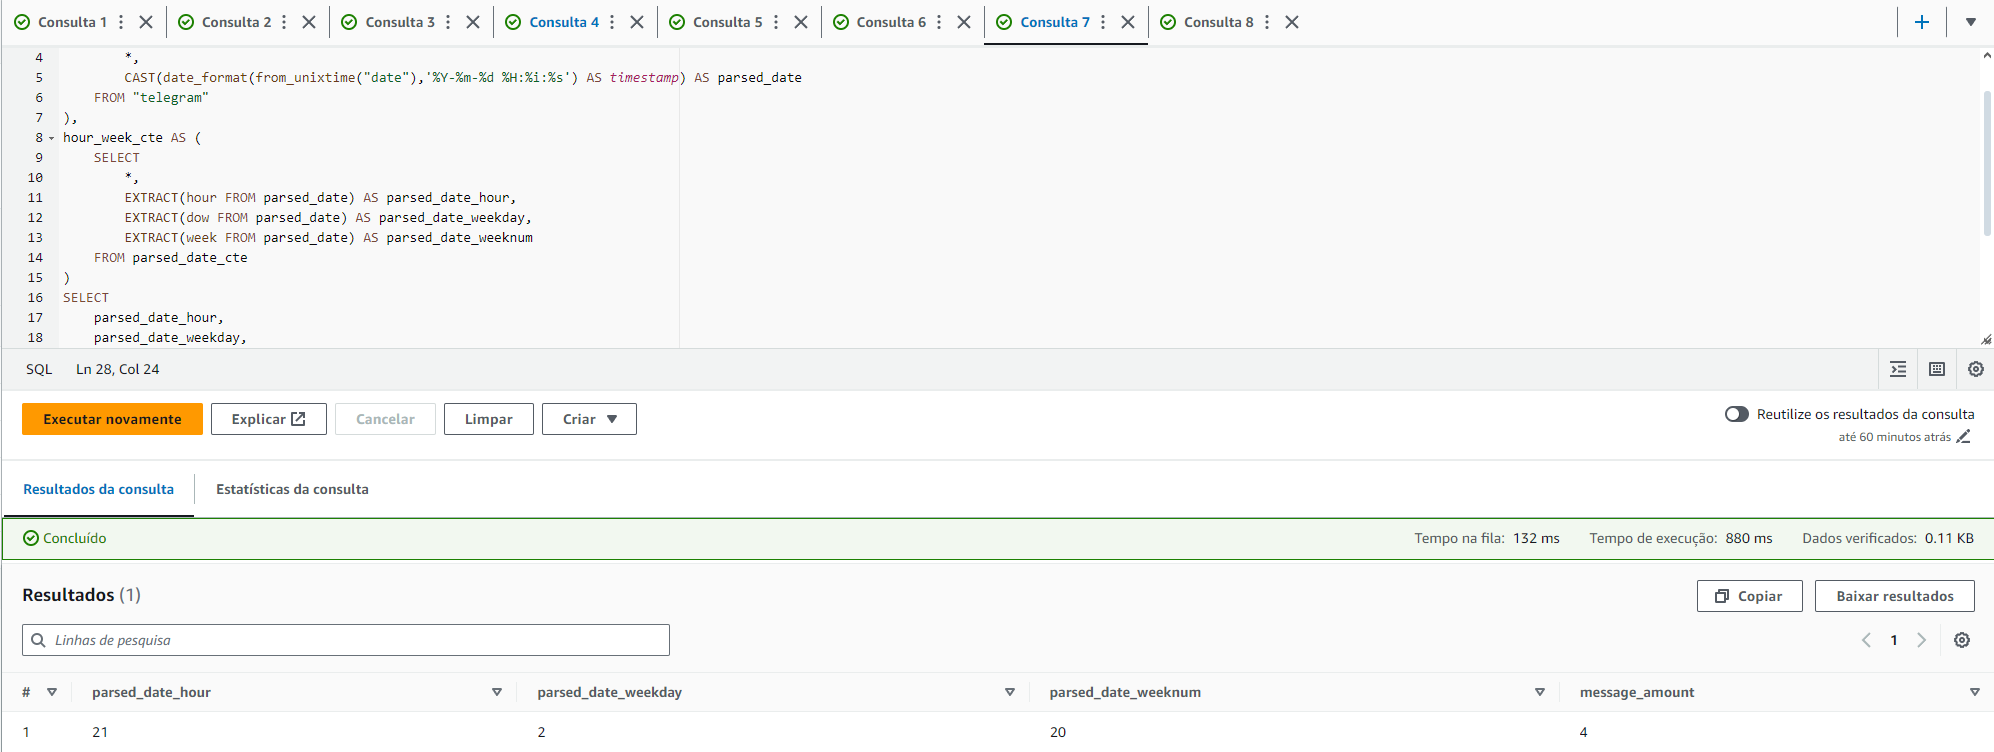

## 4\. Pipeline de Dados

**O que é um Pipeline de Dados?** São procedimentos utilizados para processar e preparar dados. Neste projeto, o usuário envia suas mensagens e elas são coletadas pela API, em seguida é injetada dentro dos serviços em nuvem e resultam na produção de insights com o Athena.

**Arquitetura do Projeto**


# 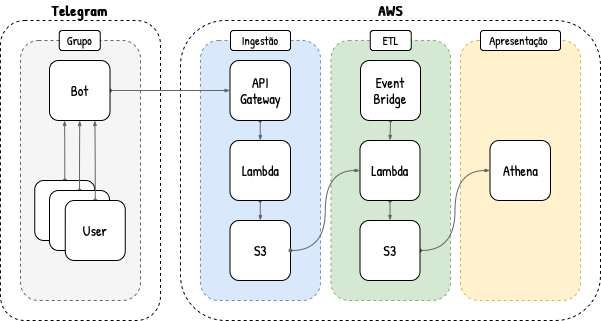

O trabalho foi concluído com êxito, as mensagens enviadas no grupo do telegram foram captadas pelo chatbot, armezenadas em nuvem, processadas pelos serviços AWS e extraída em SQL, possibilitando análises mais profundas e insights valiosos a respeito do projeto desenvolvido.